In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data=pd.read_csv("farm_production_dataset.csv")
data.head(5)

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208


In [3]:
data.isnull().sum()

REF_DATE                                    0
GEO                                         0
Type of crop                                1
Average farm price (dollars per tonne)     30
Average yield (kilograms per hectare)      27
Production (metric tonnes)                 28
Seeded area (acres)                       400
Seeded area (hectares)                    426
Total farm value (dollars)                  0
dtype: int64

In [4]:
data.interpolate(method='linear', inplace=True)

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_92865/2330188900.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


In [5]:
data=data.dropna()

In [6]:
data.duplicated().sum()

9

In [7]:
data=data.drop_duplicates()

In [8]:
data.describe()

,REF_DATE,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
count,10263.000000,10263.000000,10263.000000,1.026300e+04,1.026300e+04,1.026300e+04,1.026300e+04
mean,1947.654877,59.133477,3624.316136,1.001120e+06,1.285502e+06,5.214295e+05,5.463168e+04
std,22.214453,63.316768,6706.305690,2.747342e+06,3.678024e+06,1.488529e+06,2.482853e+05
min,1908.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1929.000000,21.000000,1055.000000,8.400000e+03,1.160000e+04,4.900000e+03,3.705000e+02
50%,1948.000000,43.000000,1485.000000,7.300000e+04,9.000000e+04,3.660000e+04,3.014000e+03
75%,1967.000000,76.000000,2370.000000,5.533000e+05,6.000000e+05,2.450500e+05,1.957750e+04
max,1984.000000,677.000000,52700.000000,2.671475e+07,3.380700e+07,1.368050e+07,4.654194e+06


In [9]:
data["REF_DATE"] = pd.to_datetime(data["REF_DATE"], format='%Y')
data.set_index("REF_DATE", inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10263 entries, 1908-01-01 to 1984-01-01
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEO                                     10263 non-null  object 
 1   Type of crop                            10263 non-null  object 
 2   Average farm price (dollars per tonne)  10263 non-null  float64
 3   Average yield (kilograms per hectare)   10263 non-null  float64
 4   Production (metric tonnes)              10263 non-null  float64
 5   Seeded area (acres)                     10263 non-null  float64
 6   Seeded area (hectares)                  10263 non-null  float64
 7   Total farm value (dollars)              10263 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 721.6+ KB


In [11]:
features = [
    "Average farm price (dollars per tonne)",
    "Average yield (kilograms per hectare)",
    "Production (metric tonnes)",
    "Seeded area (hectares)",
    "Total farm value (dollars)"
]

X = data[features]

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

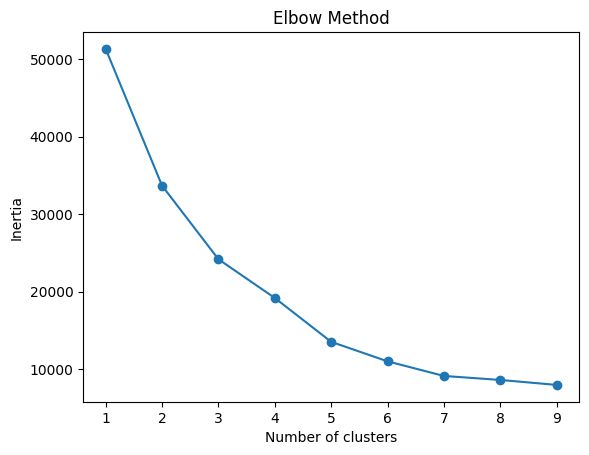

In [13]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=23, random_state=42) 
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [24]:
print(data[['Type of crop', 'Cluster']])
print(data.groupby('Cluster')[features].mean())

                       Type of crop  Cluster
REF_DATE                                    
1908-01-01                   Barley        0
1908-01-01                 Flaxseed       21
1908-01-01                     Oats        0
1908-01-01                 Rye, all       21
1908-01-01              Sugar beets        8
...                             ...      ...
1984-01-01                 Tame hay       16
1984-01-01               Wheat, all        9
1984-01-01             Wheat, durum        1
1984-01-01            Wheat, spring       13
1984-01-01  Wheat, winter remaining       14

[10263 rows x 2 columns]


TypeError: unhashable type: 'DataFrame'

In [ ]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_scaled[:, 0],
    y=X_scaled[:, 1],
    hue=data['Cluster'],
    palette=custom_palette,
    s=50
)
plt.xlabel("Avg. Price (scaled)")
plt.ylabel("Avg. Yield (scaled)")
plt.title("Crop Clusters")
plt.legend(title='Cluster')
plt.show()

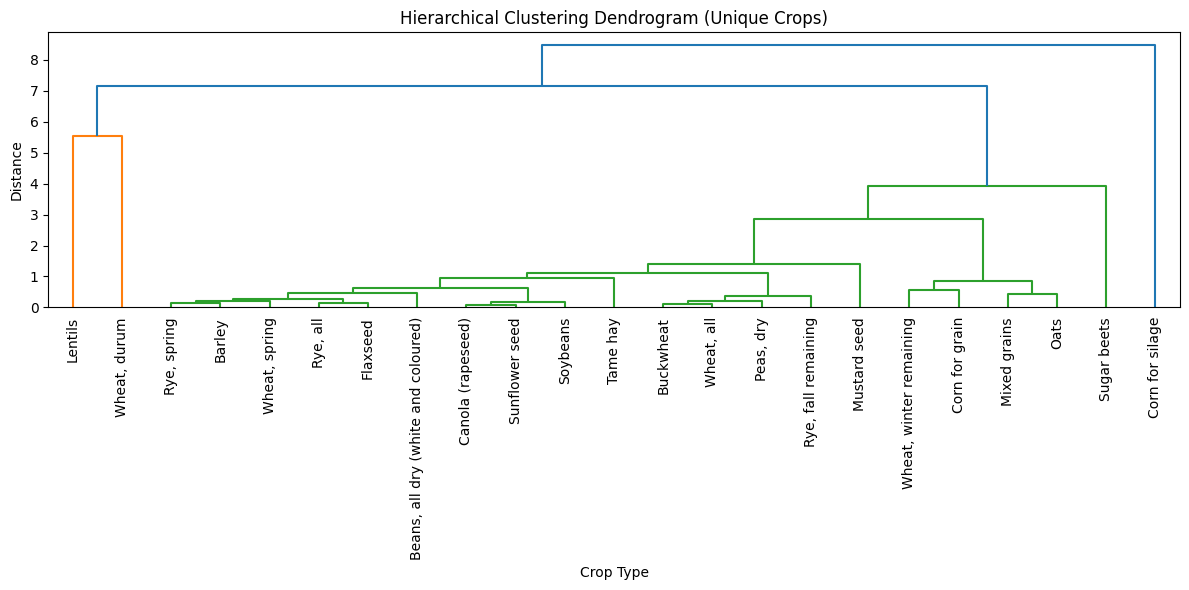

In [25]:
data_unique = data.drop_duplicates(subset='Type of crop')
features = data_unique[['Average farm price (dollars per tonne)', 
                        'Average yield (kilograms per hectare)', 
                        'Production (metric tonnes)', 
                        'Total farm value (dollars)']]
scaler = StandardScaler()
X_scaled_unique = scaler.fit_transform(features)
linked = linkage(X_scaled_unique, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=data_unique['Type of crop'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Unique Crops)')
plt.xlabel('Crop Type')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()